# Data Science - Previsão de sobreviventes ao naufrágio do Titanic

4 de abril de 2025

![Titanic](titanic.jpg)

## 1. Definição do problema

A proposta do desafio é prever quais passageiros sobreviveram ao naufrágio do Titanic, a partir de um conjunto de dados dos passageiros.

### 1.1. Dataset

https://www.kaggle.com/c/titanic/data

### 1.2. Informações gerais

O *dataset* possui variáveis numéricas e categóricas. A coluna ***TARGET*** é a variável preditora, que possui as seguintes classes:

0. Passageiro não sobreviveu
1. Passageiro sobreviveu

Este é um *dataset* pequeno, mas interessante para a utilização de técnicas básicas de transformação dos dados.

## 2. Carregamento dos dados

In [1]:
# importa bibliotecas gerais

import warnings
warnings.filterwarnings('ignore')

# importa bibliotecas de preparação dos dados

import re
import numpy as np
import pandas as pd

# importa bibliotecas de visualização dos dados

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# carrega os dados

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# guarda PassengerId para usar no dataset de envio ao Kaggle

PassengerId = test['PassengerId']

## 3. Análise exploratória dos dados

In [4]:
# informações gerais sobre o conjunto de dados de treino

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# mostra as cinco primeiras linhas do conjunto de dados de treino

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# mostra as cinco últimas linhas do conjunto de dados

train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# visão geral da distribuição estatística dos dados de treino

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# verifica o número de registros duplicados na coluna ID dos dados de treino
train['PassengerId'].duplicated().sum()

0

In [9]:
# verifica o número de registros duplicados em todas as colunas dos dados de treino, excluindo a coluna ID
train.drop(columns='PassengerId').duplicated().sum()

0

Observando as informações acima, podemos dizer que:

- O *dataset* de treino conta com **891** registros e **12** variáveis, sendo **2** do tipo *float*, **5** do tipo *int* e **5** do tipo *object*.

- Não existem registros duplicados.

- Existem registros faltantes (*missing values*) na variável *Age*.

- A média de passageiros sobreviventes é de aproximadamente 38%.

- A média de idade dos passageiros é de aproximadamente 29 anos.

- A média da tarifa paga é de 32 libras.

Vamos dar uma olhada melhor em cada uma das variáveis.

Nosso primeiro gráfico nos informa que a maioria dos passageiros estava na 3ª classe, o que nos leva a crer que pagaram as menores tarifas.

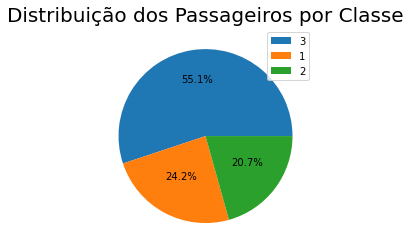

In [10]:
# histograma da classe dos passageiros do conjunto de dados de treino
class_values = train['Pclass'].value_counts()
labels = class_values.index
fig = plt.pie(class_values, autopct='%1.1f%%\n')
plt.legend(labels)
plt.title('Distribuição dos Passageiros por Classe',size = 20)
plt.show()

Vamos, então, confirmar se a maioria dos passageiros pagou tarifas mais baratas.

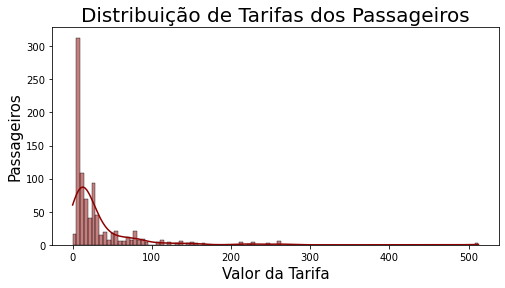

In [11]:
# histograma de tarifas dos passageiros do conjunto de dados de treino

plt.figure(figsize=(8,4))
fig = sns.histplot(train['Fare'], color="darkred", kde=True)
fig.set_xlabel("Valor da Tarifa",size=15)
fig.set_ylabel("Passageiros",size=15)
plt.title('Distribuição de Tarifas dos Passageiros',size = 20)
plt.show()

Como esperado, podemos ver pelo gráfico de distribuição de tarifas que a maior parte dos passageiros pagou tarifas mais baixas, corroborando o gráfico das classes.

Agora, vejamos a distribuição das idades.

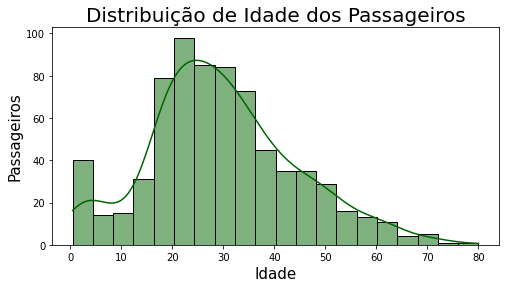

0.1    14.0
0.2    19.0
0.3    22.0
0.4    25.0
0.5    28.0
0.6    31.8
0.7    36.0
0.8    41.0
0.9    50.0
Name: Age, dtype: float64

In [12]:
# histograma de idade dos passageiros do conjunto de dados de treino e idades nos decis

plt.figure(figsize=(8,4))
fig = sns.histplot(train['Age'], color="darkgreen", kde=True)
fig.set_xlabel("Idade",size=15)
fig.set_ylabel("Passageiros",size=15)
plt.title('Distribuição de Idade dos Passageiros',size = 20)
plt.show()

train['Age'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9])

Percebe-se, ainda, que a maior parte dos passageiros se encontra na faixa etária entre 20 e 30 anos de idade.

Vamos dar uma olhada também na distribuição da família dos passageiros.

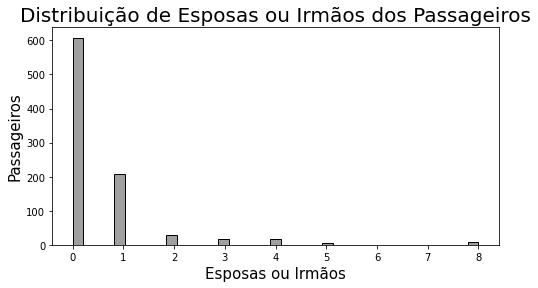

In [13]:
# histograma de esposas e irmãos dos passageiros do conjunto de dados de treino

plt.figure(figsize=(8,4))
fig = sns.histplot(train['SibSp'], color="grey")
fig.set_xlabel("Esposas ou Irmãos",size=15)
fig.set_ylabel("Passageiros",size=15)
plt.title('Distribuição de Esposas ou Irmãos dos Passageiros',size = 20)
plt.show()

Neste gráfico, vemos que a maioria dos passageiros estava desacompanhado de esposas ou irmãos.

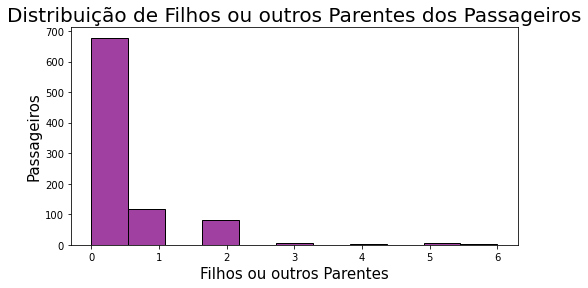

In [14]:
# histograma de filhos e outros parentes dos passageiros do conjunto de dados de treino

plt.figure(figsize=(8,4))
fig = sns.histplot(train['Parch'], color="purple")
fig.set_xlabel("Filhos ou outros Parentes",size=15)
fig.set_ylabel("Passageiros",size=15)
plt.title('Distribuição de Filhos ou outros Parentes dos Passageiros',size = 20)
plt.show()

Igualmente, neste gráfico vemos que a maioria dos passageiros também não estava acompanhado de filhos e outros parentes.

Agora vamos ver a distribuição do sexo dos passageiros.

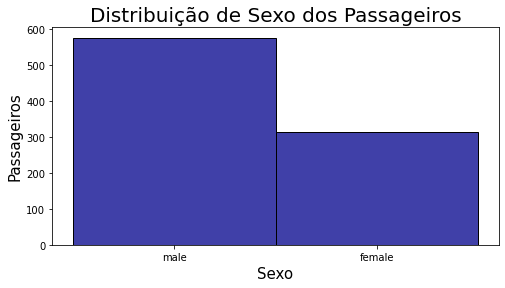

In [15]:
# histograma de sexo dos passageiros do conjunto de dados de treino

plt.figure(figsize=(8,4))
fig = sns.histplot(train['Sex'], color="darkblue")
fig.set_xlabel("Sexo",size=15)
fig.set_ylabel("Passageiros",size=15)
plt.title('Distribuição de Sexo dos Passageiros',size = 20)
plt.show()

Podemos ver neste gráfico que a maior parte dos passageiros era do sexo masculino.

Agora vamos ver as relações entre algumas variáveis e a chance de sobrevivência.

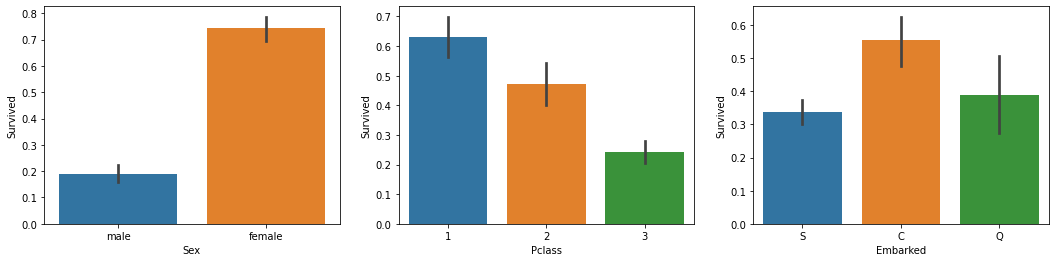

In [16]:
# plota gráficos para Survived x Sex, Pclass e Embarked

fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(18,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

O primeiro gráfico nos mostra que mais mulheres sobreviveram ao naufrágio, em que pese termos observado a maior presença de homens no navio.

Algumas hipóteses poderiam ser levantadas a partir desse dado, como, por exemplo, que o desembarque para os botes salva-vidas, no momento do naufrágio, foi realizado primeiro pelas mulheres, seguindo código de conduta da época.

No segundo gráfico, podemos ver que os passageiros da primeira classe foram os que mais sobreviveram, seguido da segunda classe e, por fim, da terceira classe.

Veja que, apesar de a terceira classe possuir a maior quantidade de passageiros, essa proporção não se refletiu nas chances de sobrevivência. Uma hipótese para isso é a de que o salvamento também ocorreu seletivamente, considerando a condição financeira e a classe das pessoas no navio.

O terceiro gráfico informa que os passageiros que embarcaram em Cherbourg foram os que mais se salvaram. Sobre esse dado, não há qualquer inferência a ser feita, já que não parece haver qualquer causalidade aparente nesse caso.

Agora veremos a influência da idade na probabilidade de sobrevivência.

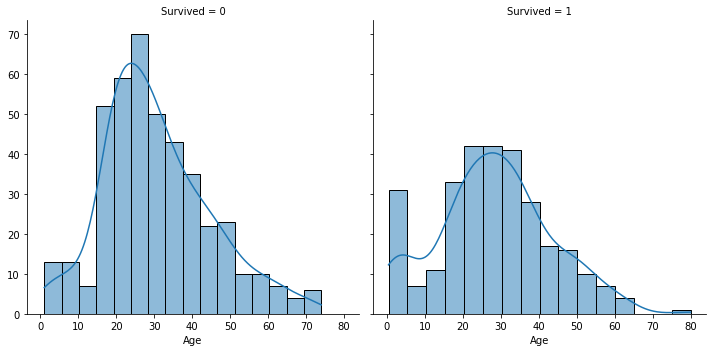

In [17]:
# histograma para ver influência da idade na probabilidade de sobrevivência

age_survived = sns.FacetGrid(train, height=5, col='Survived')
age_survived.map(sns.histplot, 'Age', kde=True);

Por este gráfico, podemos ver que a maior parte dos sobreviventes tinham de 15 a 40 anos. Contudo, essa faixa etária também foi a que mais faleceu, seguindo  e um número muito grande de crianças também sobreviveu. Esta última observação também faz sentido devido ao contexto da época, haja vista o código de conduta que era seguido no desembarque em casos de tragédias ("mulheres e crianças primeiro").

Agora que tivemos uma visão mais específica das variáveis do conjunto de dados, verificaremos quais registros do conjunto de dados possui mais de um valor *outlier*.

In [18]:
# define função para detectar dados outliers
# retorna lista com os registros outliers

from collections import Counter

def detect_outliers(df,n,features):

    outlier_indices = []
    
    # itera sobre as colunas
    for col in features:
        # 1o quartil (25%)
        Q1 = np.percentile(df[col], 25)
        # 3o quartil (75%)
        Q3 = np.percentile(df[col],75)
        # intervalo interquartil (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # cria lista de índices de outliers por coluna
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # insere o outlier da coluna a uma lista de outliers
        outlier_indices.extend(outlier_list_col)
        
    # seleciona linhas contendo mais de n outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detecta outliers de Age, SibSp, Parch e Fare
outliers_to_drop = detect_outliers(train,1,["Age","SibSp","Parch","Fare"])

# mostra as linhas com valores outliers
train.loc[outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


Os *outliers*, ou valores discrepantes, são valores incomuns no conjunto de dados que podem distorcer as estatísticas.

A primeira consequência da existência de valores discrepantes no conjunto de dados pode ser uma distorção em estatísticas univariadas, como a média ou a variância. Isso pode aumentar muito a variância ou distorcer a média.

Também pode distorcer correlações entre variáveis, capazes de gerar resultados enganosos. Isso leva a outro problema, que é a incapacidade de generalização do modelo preditivo.

Se os resultados forem baseados principalmente nos efeitos de valores discrepantes, talvez esses valores não ocorram em outras situações, o que levaria a uma distorção das nossas conclusões por este pequeno número de casos.

Nesses casos, temos que fazer uma escolha. Podemos simplesmente excluir os registros com valores discrepantes, o que não seria muito bom do ponto de vista do treinamento do modelo, porque podemos perder informações valiosas (por isso, só podemos fazer isso se não forem muitos os registros *outliers*). Também temos a opção de transformar as variáveis, por exemplo, fazendo o logaritmo da variável, ou elevando-a ao quadrado. Isso torna as pontuações e a distribuição mais simétricas e geralmente funciona melhor na maioria das análises. Além disso, podemos usar medidas ou procedimentos mais robustos, menos influenciadas por valores discrepantes. Sabe-se, por exemplo, que a mediana é menos influenciada por *outliers* do que a média, e procedimentos como árvores de decisão tendem a ser menos influenciados por *outliers*.

No presente caso, temos 81 registros que possuem mais de um valor *outlier*, o que corresponde a aproximadamente 9% de todo o conjunto de dados de treino. Na minha opinião, trata-se de uma quantidade grande de informação que seria perdida numa eventual exclusão, razão pela qual optarei por utilizar procedimentos de treinamento menos influenciáveis por *outliers* ao invés de excluir esses dados.

Vejamos, então, a correlação entre as variáveis do conjunto de dados.

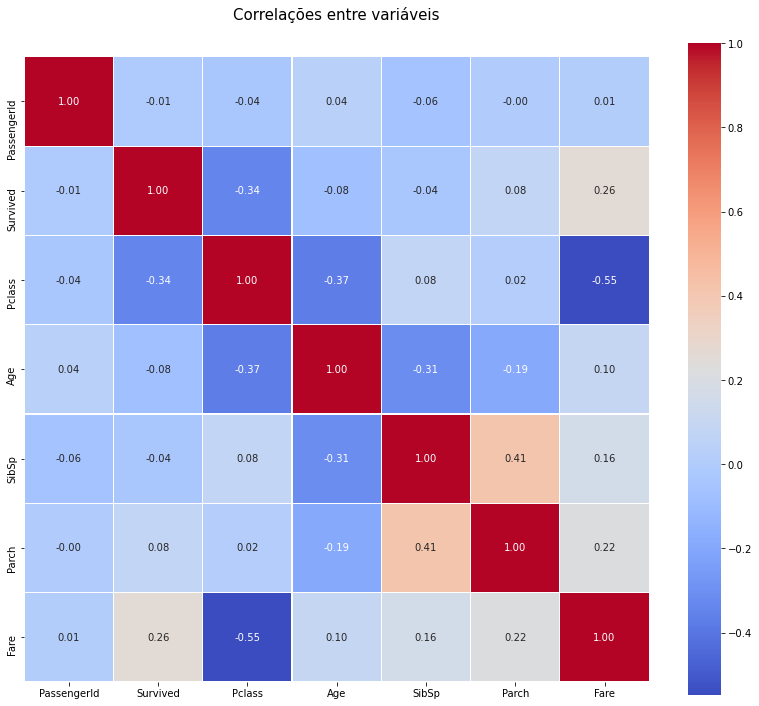

In [19]:
# plota heatmap de correlação entre dados númericos

plt.figure(figsize=(14,12))
plt.title('Correlações entre variáveis', y=1.05, size=15)
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True);

Uma coisa que temos que ter em mente é que correlação não implica causalidade. Ou seja, não podemos confundir correlação com causa e efeito.

É interessante a análise das correlações entre variáveis porque são fenômenos aparentemente relacionados que acontecem ao mesmo tempo e podem suscitar perguntas a serem investigadas, mas elas não são, em si, respostas.

O método utilizado para aferir a correlação das variáveis foi o de Pearson.

O coeficiente de correlação de Pearson mede o grau da correlação (e a direção dessa correlação, se positiva ou negativa) entre duas variáveis de escala métrica.

Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1.

- *p = 1* significa uma correlação perfeita positiva entre as duas variáveis;
- *p = -1* significa uma correlação negativa perfeita entre as duas variáveis - Isto é, se uma aumenta, a outra sempre diminui;
- *p = 0* significa que as duas variáveis não dependem linearmente uma da outra. No entanto, pode existir uma dependência não linear. Assim, o resultado *p = 0* deve ser investigado por outros meios.

Podemos interpretar *p* da seguinte forma:

- 0,9 para mais ou para menos indica uma correlação muito forte;
- 0,7 a 0,9 positivo ou negativo indica uma correlação forte;
- 0,5 a 0,7 positivo ou negativo indica uma correlação moderada;
- 0,3 a 0,5 positivo ou negativo indica uma correlação fraca;
- 0 a 0,3 positivo ou negativo indica uma correlação desprezível.

No heatmap de correlações entre as variáveis numéricas, podemos tirar algumas conclusões sobre o conjunto de dados de treino:

- A correlação entre sobreviência e classe é -0,34, o que significa que é fraca e negativa (uma correlação negativa, também chamada de inversa, indica que as duas variáveis movem-se em direções opostas e que essa relação é mais forte quanto mais o coeficiente se aproxima de -1);
- A correlação entre sobreviência e idade é -0,08, o que significa que é desprezível e negativa;
- A correlação entre sobreviência e esposas e irmãos é -0,04, o que significa que é desprezível e negativa;
- A correlação entre sobreviência e filhos e outros parentes é 0,08, o que significa que é desprezível e positiva (uma correlação positiva indica que as duas variáveis se movem juntas e que essa relação é mais forte quanto mais o coeficiente se aproxima de 1);
- A correlação entre sobreviência e tarifa é 0,26, o que significa que é desprezível e positiva.

## 4. Transformação dos dados

Vamos iniciar agora a transformação dos dados, para melhorar a eficiência do nosso modelo preditivo.

Primeiro, iremos separar a coluna Survived do restante do dataset de treino, para que não sofra alterações indesejadas, e a transformaremos em um *array* para utilização posterior.

In [20]:
# separa coluna Survived do restante do dataset de treino
train, y_train = train.drop('Survived', axis = 1), np.array(train.Survived).ravel()

Agora criaremos uma coluna *Train* para identificar quais dados são do conjunto de treino e quais dados são do conjunto de teste, pois teremos que separar os dados novamente mais tarde.

In [21]:
# cria variável de identificação para cada dataset
train['train'] = 1
test['train']  = 0

Agora iremos agrupar todos os dados de treino e de teste em um novo *dataframe*, já que as transformações que fazemos nos dados de treino devem ser realizadas também nos dados de teste.

Após isso, preenchemos os campos vazios e nulos com *NaN* (*Not a Number*).

Por fim, verificamos a quantidade de valores nulos no conjunto de dados.

In [22]:
# concatena dados em um único dataframe e preenche campos vazios e nulos com NaN
df_total = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
df_total = df_total.fillna(np.nan)

# verifica quantidade de valores nulos no conjunto inteiro
df_total.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train             0
dtype: int64

Podemos verificar que há 263 valores nulos na variável *Age*, 1 valor nulo na variável *Fare*, 1014 valores nulos na variável *Cabin* e 2 valores nulos na variável *Embarked*.

Agora nós criaremos uma variável *dummy*, para indicar se o indivíduo possuía uma cabine no navio ou não.

A estratégia aqui é transformar uma variável categórica, como a de cabine, em uma variável binária, que descreve se determinada característica está ou não presente, ou se é ou não verdadeira, e que pode ser interpretada pelo modelo preditivo.

Essa variável poderia ser útil se pudermos estabelecer uma relação entre ter uma cabine e sobreviver à tragédia.

In [23]:
# cria coluna que informa se um passageiro possuía uma cabine

df_total['Has_Cabin'] = df_total["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

df_total.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train,Has_Cabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


Igualmente, criaremos uma variável que reflete o tamanho do grupo familiar.

Essa variável pode ser útil se pudermos estabelecer uma relação entre o grupo familiar e a sobrevivência à tragédia.

É possível que, no momento da tragédia, por exemplo, algumas pessoas tenham perdido a oportunidade de se salvar procurando por seus familiares... ou o contrário: como a tragédia ocorreu à noite, pessoas que estavam desacompanhadas podem não ter percebido tudo acontecer e morreram sem aviso.

In [24]:
# cria coluna que informa o tamanho da família do passageiro (contando com ele, combinando SibSp e Parch)

df_total['FamilySize'] = df_total['SibSp'] + df_total['Parch'] + 1

df_total.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train,Has_Cabin,FamilySize
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


Neste momento, nós faremos o tratamento de valores faltantes (*missing*) da variável do local de embarque.

Para isso, preenchemos os registros faltantes com o valor modal para diminuir eventual distorção com o mínimo de impacto possível nos dados.

In [25]:
# remove todos os valores NULL na coluna Embarked, preenchendo com o valor modal

mode_embarked = df_total['Embarked'].mode()

df_total['Embarked'].fillna(mode_embarked[0], inplace=True)

df_total.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
train             0
Has_Cabin         0
FamilySize        0
dtype: int64

Da mesma forma, faremos o tratamento de valores faltantes (*missing*) da variável de tarifa.

Para isso, preenchemos os registros faltantes com o valor mediano para diminuir eventual distorção com o mínimo de impacto possível nos dados.

In [26]:
# remove todos os valores NULL na coluna Fare, preenchendo com o valor mediano

median_fare = df_total['Fare'].median()

df_total['Fare'].fillna(median_fare, inplace=True)

df_total.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
train             0
Has_Cabin         0
FamilySize        0
dtype: int64

Agora, criaremos uma nova variável, que reflete a faixa de valor da tarifa paga.

Essa variável foi criada como uma forma de discretizar a varíavel tarifa, que é contínua.

Muitos algoritmos de aprendizado de máquina são conhecidos por produzir modelos melhores quando discretizados os atributos contínuos.

In [27]:
# cria coluna com categorias (classes) de tarifas (Fare), dividindo os dados em quartis

df_total['CategoricalFare'] = pd.qcut(df_total['Fare'], 4)

df_total.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train,Has_Cabin,FamilySize,CategoricalFare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,2,"(-0.001, 7.896]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,2,"(31.275, 512.329]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1,"(7.896, 14.454]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,2,"(31.275, 512.329]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,"(7.896, 14.454]"


Então, faremos o tratamento de valores faltantes (missing) da variável de idade.

Para isso, preenchemos os registros faltantes com valores aleatórios dentro do desvio-padrão considerando a média de idades do conjunto de dados, para diminuir eventual distorção com o mínimo de impacto possível nos dados.

In [28]:
# remove todos os valores NULL na coluna Age, preenchendo com valores aleatórios dentro do desvio-padrão considerando a média de idades

age_avg = df_total['Age'].mean()
age_std = df_total['Age'].std()
age_null_count = df_total['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
df_total['Age'][np.isnan(df_total['Age'])] = age_null_random_list
df_total['Age'] = df_total['Age'].astype(int)
df_total.isnull().sum()

PassengerId           0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin              1014
Embarked              0
train                 0
Has_Cabin             0
FamilySize            0
CategoricalFare       0
dtype: int64

Assim como a variável de faixa de valor da tarifa paga, aqui nós criamos uma nova variável, que reflete a faixa de idade dos indivíduos.

Essa variável foi criada como uma forma de discretizar a varíavel idade, que é contínua.

In [29]:
# cria coluna com categorias (classes) de idades (Age), dividindo os dados de treino em quintis

df_total['CategoricalAge'] = pd.cut(df_total['Age'], 5)

df_total.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train,Has_Cabin,FamilySize,CategoricalFare,CategoricalAge
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,0,2,"(-0.001, 7.896]","(16.0, 32.0]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,1,2,"(31.275, 512.329]","(32.0, 48.0]"
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1,"(7.896, 14.454]","(16.0, 32.0]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,1,2,"(31.275, 512.329]","(32.0, 48.0]"
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,0,1,"(7.896, 14.454]","(32.0, 48.0]"


Agora, nós definimos uma função para extrair do nome dos passageiros o seu título.

In [30]:
# define função para extrair o título dos nomes dos passageiros

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    # se existir o título, extrai e retorna
    if title_search:
        return title_search.group(1)
    return ""

Usaremos essa função para criar uma nova variável, que indica o título dos passageiros.

Essa variável pode ser útil se pudermos estabelecer uma relação entre o título dos passageiros e a sobrevivência à tragédia.

In [31]:
# cria coluna contendo o título dos nomes dos passageiros

df_total['Title'] = df_total['Name'].apply(get_title)

df_total.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train,Has_Cabin,FamilySize,CategoricalFare,CategoricalAge,Title
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,0,2,"(-0.001, 7.896]","(16.0, 32.0]",Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,1,2,"(31.275, 512.329]","(32.0, 48.0]",Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1,"(7.896, 14.454]","(16.0, 32.0]",Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,1,2,"(31.275, 512.329]","(32.0, 48.0]",Mrs
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,0,1,"(7.896, 14.454]","(32.0, 48.0]",Mr


Como existem muitos títulos que estão em francês, vamos substituí-los pelos seus respectivos correspondentes em inglês. Também agruparemos títulos não comuns no *dataset* em uma única classe.

In [32]:
# agrupa títulos não comuns em um único grupo "Rare" e agrupa títulos franceses em "Miss" e "Mrs".
    
df_total['Title'] = df_total['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_total['Title'] = df_total['Title'].replace('Mlle', 'Miss')
df_total['Title'] = df_total['Title'].replace('Ms', 'Miss')
df_total['Title'] = df_total['Title'].replace('Mme', 'Mrs')

Agora nós criaremos variáveis *dummies* para as variáveis categóricas *Sex*, *Title*, *Embarked*, *CategoricalFare* e *CategoricalAge*, para que o modelo preditivo possa interpretar melhor, evitando usar codificação das categorias (ex. conversão dos valores da variável *Embarked* em 0 = S, 1 = C e 2 = Q), o que poderia levar a um modelo enviesado arbitrariamente pela relação hierárquica entre os códigos (neste exemplo, Q seria equivalente a 2 vezes C).

In [33]:
df_total = pd.get_dummies(df_total, prefix=['Sex', 'Title', 'CategoricalFare', 'CategoricalAge'], columns=['Sex', 'Title', 'CategoricalFare', 'CategoricalAge'])

df_total.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Title_Rare,"CategoricalFare_(-0.001, 7.896]","CategoricalFare_(7.896, 14.454]","CategoricalFare_(14.454, 31.275]","CategoricalFare_(31.275, 512.329]","CategoricalAge_(-0.08, 16.0]","CategoricalAge_(16.0, 32.0]","CategoricalAge_(32.0, 48.0]","CategoricalAge_(48.0, 64.0]","CategoricalAge_(64.0, 80.0]"
0,1,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,NaN,S,...,0,1,0,0,0,0,1,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,C,...,0,0,0,0,1,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,NaN,S,...,0,0,1,0,0,0,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S,...,0,0,0,0,1,0,0,1,0,0
4,5,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,NaN,S,...,0,0,1,0,0,0,0,1,0,0


Temos, então, que excluir as colunas que já não são mais necessárias ou que não possuam qualquer relação com a possibilidade de sobrevivência.

In [34]:
# exclui colunas desnecessárias

drop_elements = ['PassengerId', 'Name', 'Embarked', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare', 'Age']
df_total = df_total.drop(drop_elements, axis = 1)
df_total.head()

,Pclass,train,Has_Cabin,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,"CategoricalFare_(-0.001, 7.896]","CategoricalFare_(7.896, 14.454]","CategoricalFare_(14.454, 31.275]","CategoricalFare_(31.275, 512.329]","CategoricalAge_(-0.08, 16.0]","CategoricalAge_(16.0, 32.0]","CategoricalAge_(32.0, 48.0]","CategoricalAge_(48.0, 64.0]","CategoricalAge_(64.0, 80.0]"
0,3,1,0,2,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,1,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,3,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,1,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
4,3,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0


Finalizada a transformação dos dados, separamos os datasets de treino e de teste de novo.

In [35]:
# separa dataset conjunto em dados de treino e de teste
train_2 = df_total[df_total['train'] == 1].drop('train', axis = 1)

test_2 = df_total[df_total['train'] == 0].drop('train', axis = 1)

# retorna variável target ao dataset de treino
train_2['Survived'] = y_train

Vamos plotar novamente o heatmap de correlação entre variáveis, agora com as novas variáveis criadas durante a fase de transformação dos dados.

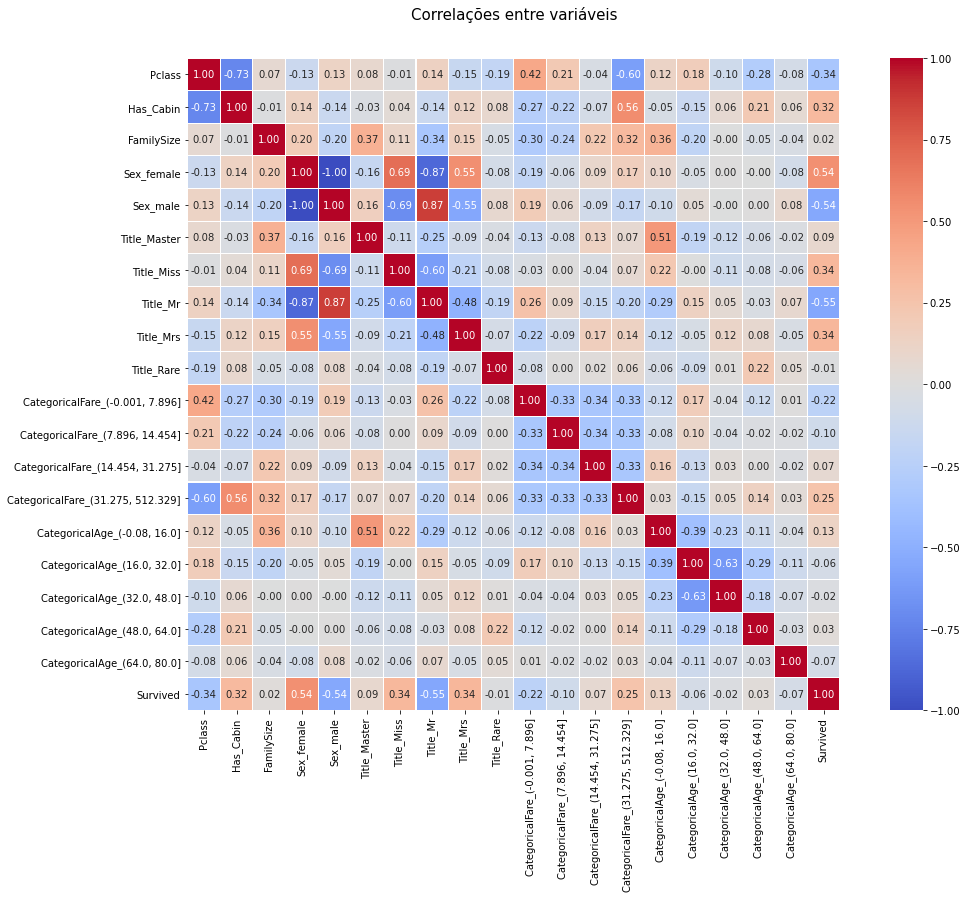

In [36]:
# plota heatmap de correlação entre dados númericos

plt.figure(figsize=(18,12))
plt.title('Correlações entre variáveis', y=1.05, size=15)
sns.heatmap(train_2.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True);

Podemos ver que as colunas que mais possuem correlação com a variável de sobrevivência são aquelas relacionadas com o sexo do passageiro (correlação moderada).

Agora, excluiremos a coluna *Survived* do dataset de treino para podermos treinar o modelo.

In [37]:
# exclui a coluna Survived do dataset de treino

train_2.drop(['Survived'], axis=1, inplace=True)

Por fim, antes de implementar o modelo preditivo, criamos arrays com os dados de treino e de teste para utilizar nos algoritmos de *machine learning*.

In [38]:
# cria arrays com os dados de teste e com os dados de treino

x_train = train_2.values
x_test = test_2.values

## 5. Implementando modelos de Machine Learning

Vamos iniciar agora a implementação dos modelos de *Machine Learning*.

In [39]:
# importa bibliotecas gerais para avaliação dos modelos de machine learning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Inicialmente, para avaliar a capacidade de generalização dos modelos de *machine learning* utilizaremos a técnica de *cross-validation*.

Para isso, utilizaremos o algoritmo ***KFold***. O que ele faz é dividir um dataset em "*k*" conjuntos de treino e teste, usando o conjunto de treino para treinar o modelo e o conjunto de teste para avaliar quão bom o modelo generaliza para dados que ele ainda não viu.

Em cada uma das "*k*" vezes, testa-se o modelo com um *fold* diferente, calculando a métrica escolhida para avaliação do modelo.

Ao final do processo, teremos "*k*" medidas da métrica de avaliação escolhida, com as quais calculamos a média e o desvio-padrão.

Para utilizar o algoritmo, temos que definir em quantas partes dividir e quantas vezes treinar e avaliar o nosso modelo (*número de folds*).

In [40]:
# definindo o valor para o número de folds (20)
kfold = KFold(n_splits = 20)

### 5.1. Regressão Logística (Logistic Regression)

A regressão logística é uma espécie de modelo de classificação paramétrica, apesar de ter a palavra ‘regressão’ em seu nome.

O algoritmo de regressão logística é usado para examinar a associação de variáveis independentes (categóricas ou contínuas) com uma variável dependente dicotômica (resposta binária, tal como 0 ou 1).

In [41]:
# importa biblioteca de Regressão Logística
from sklearn.linear_model import LogisticRegression

# cria modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')

# analisa a acurácia do modelo de Regressão Logística com kfold
lr_cv_results = cross_val_score(lr_model, x_train, y_train, cv = kfold, scoring = 'accuracy')
msg = "Acurácia do modelo de Regressão Logística: %f (%f)" % (lr_cv_results.mean(), lr_cv_results.std())
print(msg)

Acurácia do modelo de Regressão Logística: 0.817071 (0.047253)


### 5.2. Linear Discriminant Analysis

O Linear Discriminant Analysis é um classificador com um limite de decisão linear, gerado pelo ajuste de densidades condicionais de classe aos dados e usando a regra de Bayes.

O modelo ajusta uma densidade gaussiana para cada classe, assumindo que todas as classes compartilham a mesma matriz de covariância.

In [42]:
# importa biblioteca de Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# cria modelo Linear Discriminant Analysis
lda_model = LinearDiscriminantAnalysis()

# analisa a acurácia do modelo Linear Discriminant Analysis com kfold
lda_cv_results = cross_val_score(lda_model, x_train, y_train, cv = kfold, scoring = 'accuracy')
msg = "Acurácia do modelo Linear Discriminant Analysis (kfold): %f (%f)" % (lda_cv_results.mean(), lda_cv_results.std())
print(msg)

Acurácia do modelo Linear Discriminant Analysis (kfold): 0.829343 (0.052432)


### 5.3. Árvore de Decisão (Decision Tree)

O algoritmo de árvore de decisão é um método de aprendizado supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável de destino, aprendendo regras de decisão simples inferidas dos recursos de dados.

As árvores de decisão usam vários algoritmos para decidir dividir um nó em dois ou mais subnós. A criação de subnós aumenta a homogeneidade dos subnós resultantes. Em outras palavras, podemos dizer que a pureza do nó aumenta em relação à variável alvo. A árvore de decisão divide os nós em todas as variáveis disponíveis e, em seguida, seleciona a divisão que resulta na maioria dos subnós homogêneos.

A decisão de fazer divisões estratégicas afeta fortemente a precisão de uma árvore. Os critérios de decisão são diferentes para árvores de classificação e regressão.

In [43]:
# importa biblioteca de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

# cria modelo de Árvore de Decisão
tree_model = DecisionTreeClassifier(max_depth=3)

# analisa a acurácia do modelo de Árvore de Decisão com kfold
tree_cv_results = cross_val_score(tree_model, x_train, y_train, cv = kfold, scoring = 'accuracy')
msg = "Acurácia do modelo de Árvore de Decisão (kfold): %f (%f)" % (tree_cv_results.mean(), tree_cv_results.std())
print(msg)

Acurácia do modelo de Árvore de Decisão (kfold): 0.820379 (0.059204)


### 5.4. Ensacamento (Bagging)

Um classificador Bagging é um metaestimador de conjunto que ajusta classificadores de base cada um em subconjuntos aleatórios do conjunto de dados original e, em seguida, agrega suas previsões individuais (por votação ou por média) para formar uma previsão final.

Esse metaestimador pode ser usado como uma forma de reduzir a variância de um estimador de caixa preta (por exemplo, uma árvore de decisão, que é o estimador base padrão deste algoritmo no *sklearn*), introduzindo a aleatorização em seu procedimento de construção e, em seguida, fazendo um conjunto a partir dele.

In [44]:
# importa biblioteca de Bagging
from sklearn.ensemble import BaggingClassifier

# cria modelo Bagging
bg_model = BaggingClassifier()

# analisa a acurácia do modelo Bagging com kfold
bg_cv_results = cross_val_score(bg_model, x_train, y_train, cv = kfold, scoring = 'accuracy')
msg = "Acurácia do modelo de Bagging (kfold): %f (%f)" % (bg_cv_results.mean(), bg_cv_results.std())
print(msg)

Acurácia do modelo de Bagging (kfold): 0.818384 (0.049602)


### 5.5. Floresta Aleatória (Random Forest)

Uma floresta aleatória é um metaestimador que ajusta vários classificadores de árvore de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e o sobreajuste de controle.

O tamanho da subamostra é controlado com o parâmetro *max_samples* se *bootstrap = True* (padrão). Caso contrário, todo o conjunto de dados é usado para construir cada árvore.

In [45]:
# importa biblioteca de Random Forest
from sklearn.ensemble import RandomForestClassifier

# cria modelo de Random Forest
rf_model = RandomForestClassifier()

# analisa a acurácia do modelo de Random Forest com kfold
rf_cv_results = cross_val_score(rf_model, x_train, y_train, cv = kfold, scoring = 'accuracy')
msg = "Acurácia do modelo de Random Forest (kfold): %f (%f)" % (rf_cv_results.mean(), rf_cv_results.std())
print(msg)

Acurácia do modelo de Random Forest (kfold): 0.824091 (0.058464)


### 5.6. Extra Trees Classifier

O classificador Extra Trees é um metaestimador que ajusta um número de árvores de decisão aleatórias (também conhecidas como árvores extras) em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e para controlar o sobreajuste.

In [46]:
# importa biblioteca de Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# cria modelo Extra Trees Classifier
etrees_model = ExtraTreesClassifier()

# analisa a acurácia do modelo Extra Trees Classifier com kfold
etrees_cv_results = cross_val_score(etrees_model, x_train, y_train, cv = kfold, scoring = 'accuracy')
msg = "Acurácia do modelo Extra Trees Classifier (kfold): %f (%f)" % (etrees_cv_results.mean(), etrees_cv_results.std())
print(msg)

Acurácia do modelo Extra Trees Classifier (kfold): 0.822854 (0.048777)


### 5.7. AdaBoost 

Um classificador AdaBoost é um metaestimador que começa ajustando um classificador no conjunto de dados original e, em seguida, ajusta cópias adicionais do classificador no mesmo conjunto de dados, mas onde os pesos das instâncias classificadas incorretamente são ajustados de modo que os classificadores subsequentes se concentrem mais em casos difíceis.

O estimador base padrão deste algoritmo no *sklearn* é a árvore de decisão.

In [47]:
# importa biblioteca de AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# cria modelo de AdaBoost
bst_model = AdaBoostClassifier(n_estimators=34)

# analisa a acurácia do modelo de AdaBoost com kfold
bst_cv_results = cross_val_score(bst_model, x_train, y_train, cv = kfold, scoring = 'accuracy')
msg = "Acurácia do modelo de AdaBoost (kfold): %f (%f)" % (bst_cv_results.mean(), bst_cv_results.std())
print(msg)

Acurácia do modelo de AdaBoost (kfold): 0.812525 (0.050940)


### 5.8. Gradient Boosting

O Gradient Boosting se baseia na expectativa de que o melhor próximo modelo possível, quando combinado com os modelos anteriores, minimiza o erro geral de previsão. A ideia principal é definir os resultados desejados para este próximo modelo, a fim de minimizar o erro.

A principal diferença entre o AdaBoost e o Gradient Boosting Algorithm é como os dois algoritmos identificam as deficiências dos alunos fracos (por exemplo, árvores de decisão).

Enquanto o modelo AdaBoost identifica as deficiências usando pontos de dados de alto peso, o Gradient Boosting tem o mesmo desempenho usando gradientes na função de perda. A função de perda é uma medida que indica quão bons são os coeficientes do modelo no ajuste dos dados subjacentes.

In [48]:
# importa biblioteca de Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# cria modelo de Gradient Boosting
gbst_model = GradientBoostingClassifier(n_estimators=100)

# analisa a acurácia do modelo de Gradient Boosting com kfold
gbst_cv_results = cross_val_score(gbst_model, x_train, y_train, cv = kfold, scoring = 'accuracy')
msg = "Acurácia do modelo de Gradient Boosting (kfold): %f (%f)" % (gbst_cv_results.mean(), gbst_cv_results.std())
print(msg)

Acurácia do modelo de Gradient Boosting (kfold): 0.839646 (0.053999)


### 5.9. XGBoost

XGBoost é a abreviação de “eXtreme Gradient Boosting”. O “eXtreme” refere-se a melhorias de velocidade, como computação paralela e reconhecimento de cache, que torna o XGBoost bem mais rápido do que o Gradient Boosting tradicional. Além disso, o XGBoost inclui um algoritmo de localização de divisão exclusivo para otimizar árvores, junto com a regularização integrada que reduz o sobreajuste. De modo geral, o XGBoost é uma versão mais rápida e precisa do Gradient Boosting.

In [49]:
# importa biblioteca de XGB
import xgboost as xgb

# cria modelo XGB
xgb_model = xgb.XGBClassifier()

# analisa a acurácia do modelo XGB com kfold
xgb_cv_results = cross_val_score(xgb_model, x_train, y_train, cv = kfold, scoring = 'accuracy')
msg = "Acurácia do modelo XGB (kfold): %f (%f)" % (xgb_cv_results.mean(), xgb_cv_results.std())
print(msg)

[09:54:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:54:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:54:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:54:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### 5.10. Verificação do melhor modelo de Machine Learning para o caso

Uma vez verificada a média da acurácia de todos os modelos treinados, junto com seu desvio-padrão, vejamos qual teve o melhor desempenho nesse quesito.

In [50]:
# lista acurácia dos modelos, em ordem decrescente
models = pd.DataFrame({
    'Modelo': ['Regressão Logística (RL)', 'Linear Discriminant Analysis (LDA)', 'Árvore de Decisão (AD)',
              'Bagging (Bg)', 'Random Forest (RF)', 'Extra Trees (ET)', 'AdaBoost (AB)',
              'Gradient Boosting (GB)', 'XGB (XGB)'],
    'Score': [lr_cv_results.mean(), lda_cv_results.mean(), tree_cv_results.mean(),
              bg_cv_results.mean(), rf_cv_results.mean(), etrees_cv_results.mean(), bst_cv_results.mean(),
              gbst_cv_results.mean(), xgb_cv_results.mean()]})

models.sort_values(by='Score', ascending=False)

,Modelo,Score
7,Gradient Boosting (GB),0.839646
1,Linear Discriminant Analysis (LDA),0.829343
4,Random Forest (RF),0.824091
5,Extra Trees (ET),0.822854
2,Árvore de Decisão (AD),0.820379
8,XGB (XGB),0.819596
3,Bagging (Bg),0.818384
0,Regressão Logística (RL),0.817071
6,AdaBoost (AB),0.812525


Vamos também plotar um *boxplot* para ter uma melhor visualização do desempenho dos modelos.

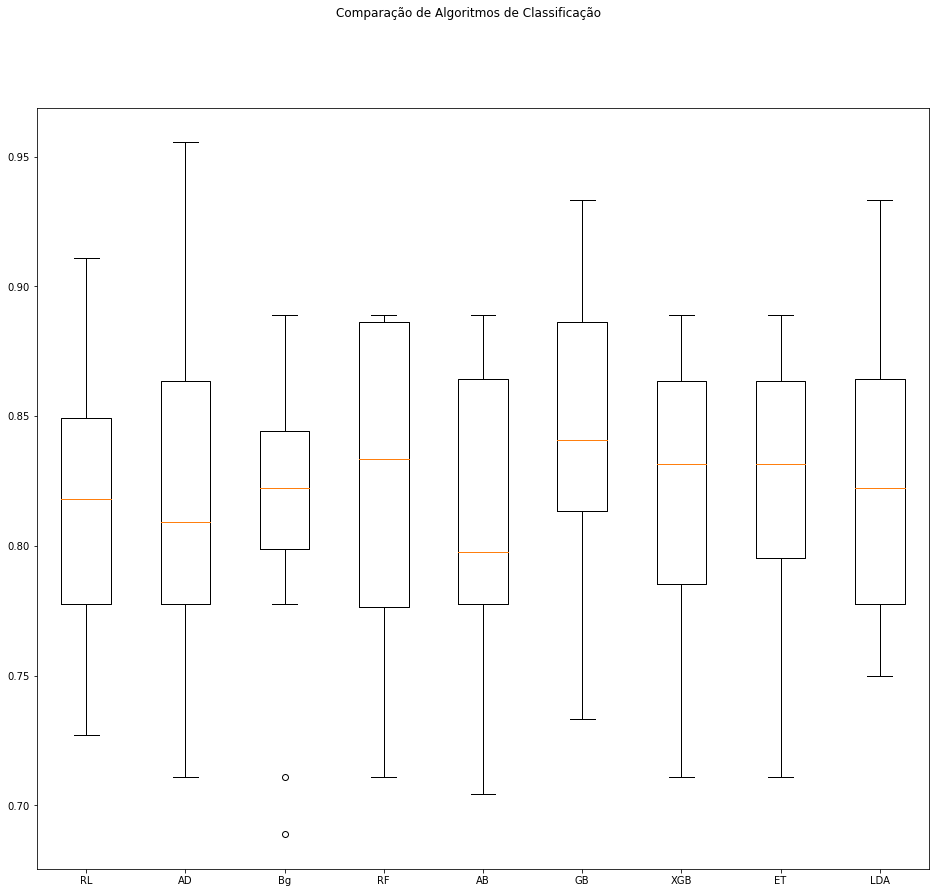

In [51]:
resultados = [lr_cv_results, tree_cv_results,
              bg_cv_results, rf_cv_results, bst_cv_results, gbst_cv_results,
              xgb_cv_results, etrees_cv_results, lda_cv_results]

nomes = ['RL', 'AD', 'Bg', 'RF', 'AB', 'GB', 'XGB', 'ET', 'LDA']

# Boxplot para comparar os algoritmos
fig = plt.figure(figsize=(16,14))
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

Iremos pegar o modelo que melhor desempenhou na acurácia e testar diversos hiperparâmetros para encontrar o que pode ser mais eficiente no modelo selecionado.

In [52]:
# testa diversos hiperparâmetros para encontrar o que pode ser mais eficiente no modelo selecionado

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

model_params = {
    # amostra aleatória de 4 a 200 estimators
    'n_estimators': randint(4,200),
    # max_features normalmente distribuída, com média .25, desvio-padrão 0.1, limitado entre 0 e 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # distribuição uniforme de 0.01 a 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

gbst_model = GradientBoostingClassifier() # incluir aqui o modelo para o teste

# configura a busca aleatória de metaestimadores
# isto irá treinar 100 modelos através de 5 dobras de cross validation (500 modelos no total)
clf = RandomizedSearchCV(gbst_model, model_params, n_iter=100, cv=5, random_state=1)

# treina os modelos para encontrar o melhor modelo em cada 100 candidatos
model = clf.fit(x_train, y_train)

# imprime o conjunto vencedor de hiperparâmetros
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 0.2683037060567194,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.024777428238277346,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 74,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


Agora iremos treinar novamente nosso modelo.

In [53]:
gbst_model = GradientBoostingClassifier(max_features=0.2683037060567194, n_estimators=74, min_samples_split=0.024777428238277346, random_state=1234)
gbst_model.fit(x_train, y_train)
gbst_predictions = gbst_model.predict(x_test);

### 5.11. Avaliações Adicionais

Agora iremos usar alguns métodos para avaliar melhor nosso modelo.

O primeiro deles será a matriz de confusão.

A matriz de confusão é uma tabela frequentemente usada para descrever o desempenho de um modelo de classificação (ou "classificador") em um conjunto de dados de teste para os quais os valores verdadeiros são conhecidos.

A primeira linha da matriz é sobre as predições dos não sobreviventes:
- em [0,0] temos passageiros que foram classificados corretamente como não sobreviventes (chamados de verdadeiros negativos);
- em [0,1] temos passageiros que foram erroneamente classificados como não sobreviventes (falsos negativos).

A segunda linha da matriz é sobre as previsões dos sobreviventes:
- em [1,0] temos passageiros classificados erroneamente como sobreviventes (falsos positivos);
- em [1,1] temos passageiros corretamente classificados como sobreviventes (positivos verdadeiros).

In [54]:
# cria matriz de confusão
# importa bibliotecas de Cross Validation e Confusion Matrix

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# a primeira linha da matriz é sobre as predições dos não sobreviventes:
# em [0,0] temos passageiros que foram classificados corretamente como não sobreviventes (chamados de verdadeiros negativos)
# em [0,1] temos passageiros que foram erroneamente classificados como não sobreviventes (falsos negativos)

# a segunda linha da matriz é sobre as previsões dos sobreviventes:
# em [1,0] temos passageiros classificados erroneamente como sobreviventes (falsos positivos)
# em [1,1] temos passageiros corretamente classificados como sobreviventes (positivos verdadeiros)

predictions = cross_val_predict(gbst_model, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[495,  54],
       [ 92, 250]], dtype=int64)

Agora iremos medir a Precisão (*Precision*) e a Recuperação (*Recall*) do modelo preditivo.

Precisão e Recuperação são métricas de avaliação de classificação.

Em geral, priorizamos a precisão quando os falsos positivos são considerados mais prejudiciais do que os falsos negativos, pois verifica, dentre todas as classificações de classe positivas que o modelo fez, quantas estão corretas.

Por exemplo, ao classificar um ativo como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos (situação de falso negativo) no processo. Ou seja, o modelo deve ser preciso em suas classificações, pois, a partir do momento em que consideramos um investimento bom quando, na verdade, ele não é, prejuízos enormes podem ocorrer.

Ou seja, se quisermos alterar o modelo para que o desempenho dele melhore ao classificar a classe positiva, precisamos aumentar sua precisão.

Já o *recall* é priorizado em uma situação em que os falsos negativos são considerados mais prejudiciais que os falsos positivos. Por exemplo, em uma compra com cartão de crédito, o modelo deve, de qualquer maneira, encontrar todas as compras fraudulentas, mesmo que classifique algumas compras corretas como fraudulentas (situação de falso positivo) no processo. Ou seja, o modelo deve ter alto recall, pois classificar compras fraudulentas como corretas causaria enormes prejuízos.

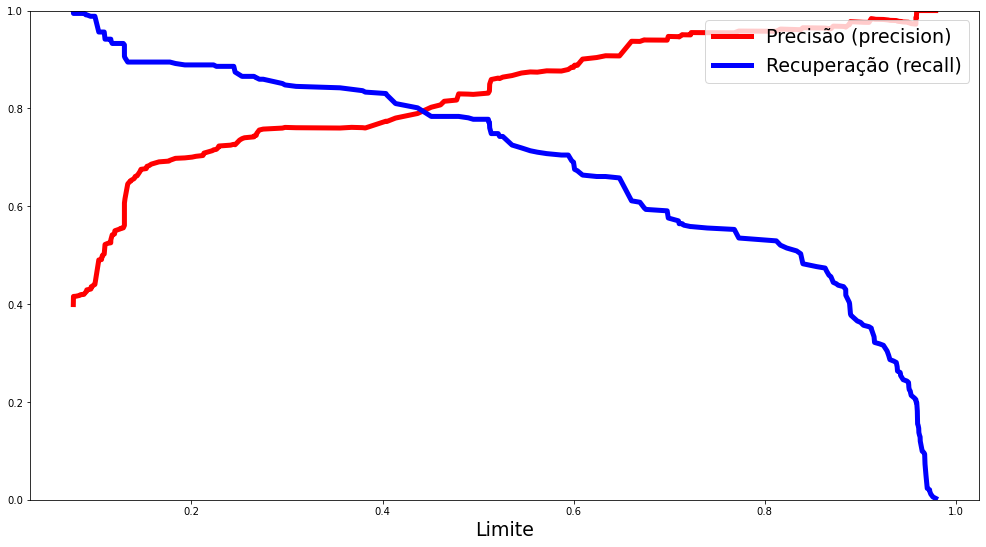

Precisão (Precision): 0.8223684210526315
Recuperação (Recall): 0.7309941520467836


In [55]:
# mede a precisão e a recuperação do modelo

# importa bibliotecas de Precision e Recall

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

# Obtendo as probabilidades de nossas previsões

y_scores = gbst_model.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

# plota gráfico de precisão e recuperação

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precisão (precision)", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recuperação (recall)", linewidth=5)
    plt.xlabel("Limite", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(17, 9))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

print("Precisão (Precision):", precision_score(y_train, predictions))
print("Recuperação (Recall):",recall_score(y_train, predictions))

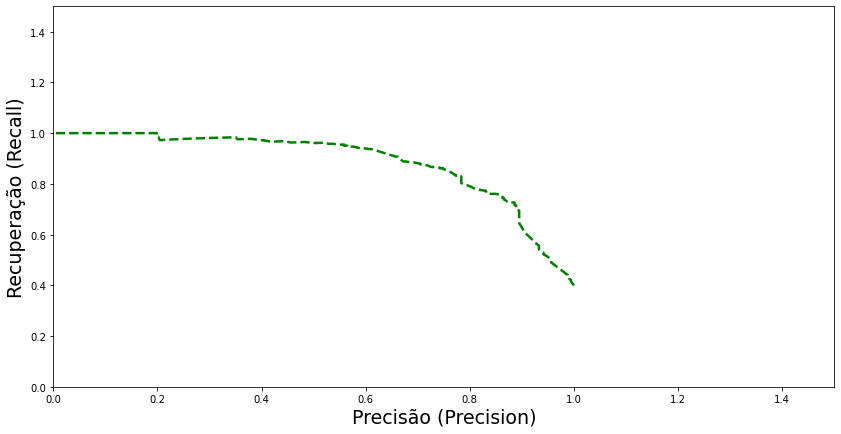

In [56]:
# plota gráfico Recall x Precision

def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("Recuperação (Recall)", fontsize=19)
    plt.xlabel("Precisão (Precision)", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

Agora iremos plotar a Curva Característica de Operação do Receptor (Receiver Operating Characteristic Curve - ROC) e calcular a Área abaixo da Curva Característica de Operação do Receptor (Area under ROC Curve - AUC).

Uma curva ROC é um gráfico que mostra o desempenho de um modelo de classificação em todos os limiares de classificação. Esta curva representa dois parâmetros:

- Taxa de verdadeiro positivo (Sensibilidade) no eixo *y*, nos diz qual proporção de verdadeiros positivos;
- Taxa de falso positivo (1 - Especificidade) no eixo *x*, nos diz qual proporção de falsos positivos.

A linha diagonal em vermelho mostra os pontos onde a taxa de verdadeiro positivo é igual à taxa de falso positivo. Em qualquer ponto desta linha, temos que a proporção de verdadeiros positivos é igual à proporção de falsos positivos.

A AUC fornece uma medida agregada de desempenho em todos os limiares de classificação possíveis. É uma forma de comparar o desempenho entre diferentes modelos. Quanto maior a AUC, melhor será o modelo em distinguir entre passageiros sobreviventes e não sobreviventes.

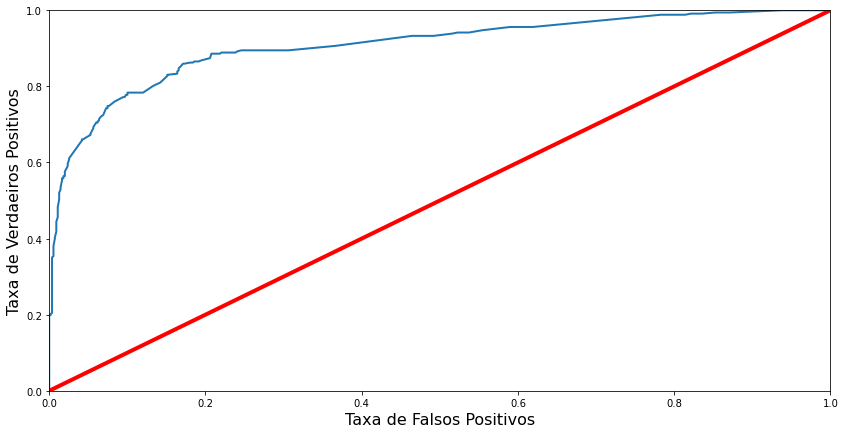

AUC: 0.9071890412126248


In [57]:
# mede ROC e AUC

# importa biblioteca de curva ROC

from sklearn.metrics import roc_curve, roc_auc_score

# calcular taxa positiva verdadeira e taxa de falsos positivos

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

# plotando a Curva ROC

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Taxa de Falsos Positivos', fontsize=16)
    plt.ylabel('Taxa de Verdaeiros Positivos', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

# calculando AUC

r_a_score = roc_auc_score(y_train, y_scores)
print("AUC:", r_a_score)

## 6. Previsão de um cenário específico

Aqui, fizemos uma palhaçadinha para ver se Jack e Rose, do filme Titanic, sobreviveriam à tragédia, conforme o modelo treinado.

In [58]:
# prevê um cenário específico
# sobrevive? => 1 = Sim; 0 = Não

# array = Pclass, Has_Cabin, FamilySize, Sex_female, Sex_male, Title_Master, Title_Miss, Title_Mr, Title_Mrs, Title_Rare,
# CategoricalFare_(-0.001, 7.896], CategoricalFare_(7.896, 14.454], CategoricalFare_(14.454, 31.275], CategoricalFare_(31.275, 512.329],
# CategoricalAge_(-0.08, 16.0], CategoricalAge_(16.0, 32.0], CategoricalAge_(32.0, 48.0], CategoricalAge_(48.0, 64.0], CategoricalAge_(64.0, 80.0]

# Pclass =>                             1a Classe = 1; 2a Classe = 2; 3a Classe = 3
# Has_Cabin =>                          Possui cabine = 1; Não possui cabine = 0
# FamilySize =>                         Tamanho do grupo familiar, contando com o passageiro
# Sex_female =>                         É mulher = 1; Não é mulher = 0
# Sex_male =>                           É homem = 1; Não é homem = 0
# Title_Master =>                       Possui título Master = 1; Não possui título Master = 0
# Title_Miss =>                         Possui título Miss = 1; Não possui título Miss = 0
# Title_Mr =>                           Possui título Mr = 1; Não possui título Mr = 0
# Title_Mrs =>                          Possui título Mrs = 1; Não possui título Mrs = 0
# Title_Rare =>                         Possui título Rare = 1; Não possui título Rare = 0
# CategoricalFare_(-0.001, 7.896] =>    Pagou tarifa entre -0.001 e 7.896 = 1; Não pagou tarifa entre -0.001 e 7.896 = 0
# CategoricalFare_(7.896, 14.454] =>    Pagou tarifa entre 7.896 e 14.454 = 1; Não pagou tarifa entre 7.896 e 14.454 = 0
# CategoricalFare_(14.454, 31.275] =>   Pagou tarifa entre 14.454 e 31.275 = 1; Não pagou tarifa entre 14.454 e 31.275 = 0
# CategoricalFare_(31.275, 512.329] =>  Pagou tarifa entre 31.275 e 512.329 = 1; Não pagou tarifa entre 31.275 e 512.329 = 0
# CategoricalAge_(-0.08, 16.0] =>       Possui idade entre -0.08 e 16.0 = 1; Não possui idade entre -0.08 e 16.0 = 0
# CategoricalAge_(16.0, 32.0] =>        Possui idade entre 16.0 e 32.0 = 1; Não possui idade entre 16.0 e 32.0 = 0
# CategoricalAge_(32.0, 48.0] =>        Possui idade entre 32.0 e 48.0 = 1; Não possui idade entre 32.0 e 48.0 = 0
# CategoricalAge_(48.0, 64.0] =>        Possui idade entre 48.0 e 64.0 = 1; Não possui idade entre 48.0 e 64.0 = 0
# CategoricalAge_(64.0, 80.0] =>        Possui idade entre 64.0 e 80.0 = 1; Não possui idade entre 64.0 e 80.0 = 0

rose = np.array([1,1,3,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0]).reshape(1, -1)
jack = np.array([3,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0]).reshape(1, -1)

print("Rose sobrevive?\t{}".format(gbst_model.predict(rose)[0]))
print("Jack sobrevive?\t{}".format(gbst_model.predict(jack)[0]))

Rose sobrevive?	1
Jack sobrevive?	0


## 7. Gerando arquivo para envio ao Kaggle

In [59]:
Submission = pd.DataFrame({ 'PassengerId': PassengerId, 'Survived': gbst_predictions })

In [60]:
# gerando arquivo csv para envio
Submission.to_csv("gbst_submission.csv", index=False)

Submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
